In [4]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import seaborn as sns

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c = c, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title=color_by_col, loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

%matplotlib widget

ModuleNotFoundError: No module named 'mplcursors'

In [ ]:
iM1 = 'unknown_1'
iM2 = 'oxidation_response'

In [ ]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = 'Carbon Source (g/L)')
plt.show()

In [4]:
ica_data.view_imodulon(iM1).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,uniprot,operon,kegg_maps,EC_number,chromosome_id
ZCP4_1062,0.135182,ZCP4_1062,CP006818.1,1198583.0,1198822.0,-,hypothetical protein,No COG annotation,NaN,Op1163,NaN,NaN,CP006818.1
ZCP4_0429,0.135051,rpsI,CP006818.1,481797.0,482345.0,+,SSU ribosomal protein S9P,"Translation, ribosomal structure and biogenesis",Q5NP53,Op551,map03010,NaN,CP006818.1
ZCP4_0428,0.129566,rplM,CP006818.1,481318.0,481797.0,+,LSU ribosomal protein L13P,"Translation, ribosomal structure and biogenesis",Q5NP52,Op550,map03010,NaN,CP006818.1
ZCP4_0741,0.128929,rpsK,CP006818.1,839171.0,839560.0,-,SSU ribosomal protein S11P,"Translation, ribosomal structure and biogenesis",Q5NQ41,Op850,map03010,NaN,CP006818.1
ZCP4_0110,0.125140,rpsF,CP006818.1,126498.0,126872.0,-,SSU ribosomal protein S6P,"Translation, ribosomal structure and biogenesis",Q5NN61,Op251,map03010,NaN,CP006818.1
ZCP4_0108,0.124880,rplI,CP006818.1,125609.0,126238.0,-,LSU ribosomal protein L9P,"Translation, ribosomal structure and biogenesis",Q5NN59,Op249,map03010,NaN,CP006818.1
ZCP4_1632,0.124701,rpmI,CP006818.1,1841233.0,1841436.0,+,LSU ribosomal protein L35P,"Translation, ribosomal structure and biogenesis",Q5NMC0,Op1707,map03010,NaN,CP006818.1
ZCP4_1271,0.123071,rplY,CP006818.1,1439062.0,1439724.0,-,LSU ribosomal protein L25P,"Translation, ribosomal structure and biogenesis",Q5NL76,Op1368,map03010,NaN,CP006818.1
ZCP4_0739,0.118049,rplQ,CP006818.1,837475.0,837897.0,-,LSU ribosomal protein L17P,"Translation, ribosomal structure and biogenesis",Q5NQ39,Op848,map03010,NaN,CP006818.1
ZCP4_0740,0.117899,rpoA,CP006818.1,838017.0,839078.0,-,DNA-directed RNA polymerase subunit alpha,Transcription,Q5NQ40,Op849,map00230;map00240;map01100;map03020,2.7.7.6,CP006818.1


In [5]:
ica_data.view_imodulon(iM2).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,uniprot,operon,kegg_maps,EC_number,chromosome_id
ZCP4_0898,0.273176,sacB,CP006818.1,991567.0,992838.0,-,Levansucrase/Invertase,Carbohydrate transport and metabolism,P0DJA3,Op1002,map00052;map00500;map01100;map02020,"2.4.1.10,3.2.1.26",CP006818.1
ZCP4_0877,0.233171,ZCP4_0877,CP006818.1,974235.0,974681.0,-,hypothetical protein,No COG annotation,Q5NQI3,Op982,NaN,NaN,CP006818.1
ZCP4_0889,0.232514,ZCP4_0889,CP006818.1,981256.0,982107.0,-,hypothetical protein,No COG annotation,NaN,Op994,NaN,NaN,CP006818.1
ZCP4_0878,0.232164,ZCP4_0878,CP006818.1,974678.0,975046.0,-,hypothetical protein,No COG annotation,Q5NQI4,Op983,NaN,NaN,CP006818.1
ZCP4_0897,0.223259,ZCP4_0897,CP006818.1,990170.0,991411.0,-,Levansucrase/Invertase,Carbohydrate transport and metabolism,NaN,Op1001,map00052;map00500;map01100;map02020,"2.4.1.10,3.2.1.26",CP006818.1
ZCP4_0383,0.215909,ZCP4_0383,CP006818.1,423837.0,424058.0,+,hypothetical protein,No COG annotation,NaN,Op507,NaN,NaN,CP006818.1
ZCP4_0876,0.210015,ZCP4_0876,CP006818.1,973829.0,974230.0,-,hypothetical protein,No COG annotation,Q5NQI2,Op981,NaN,NaN,CP006818.1
ZCP4_0384,0.206436,ZCP4_0384,CP006818.1,424051.0,424479.0,+,hypothetical protein,No COG annotation,NaN,Op508,NaN,NaN,CP006818.1
ZCP4_0382,0.195359,ZCP4_0382,CP006818.1,423248.0,423802.0,+,putative secretion activating protein,Function unknown,NaN,Op506,NaN,NaN,CP006818.1
ZCP4_0884,0.187024,ZCP4_0884,CP006818.1,978727.0,979386.0,-,hypothetical protein,No COG annotation,Q5NQJ1,Op989,NaN,NaN,CP006818.1


In [6]:
df = ica_data.sample_table
samps = df[df['study'] == 'ethanologens_ferment'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = abs(bby_A).mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False)

/home/chris/miniforge3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SRX5329169,SRX5329170,SRX5329171,SRX5329172,SRX5329173,SRX5329174,SRX5329175,SRX5329176,SRX5329177,SRX5329178,...,SRX5329186,SRX5329187,SRX5329188,SRX5329189,SRX5329190,SRX5329191,SRX5329192,SRX5329193,SRX5329194,mean
translation_1,-19.068447,0.496391,-0.204973,-19.633593,-10.986669,2.909821,-1.155018,-15.874779,1.250129,-21.103399,...,-21.364896,-13.623367,-17.419898,-21.601870,-21.447648,-21.342877,-10.712371,-13.828143,1.734090,12.157167
nitrogen_fixation,13.566857,-0.434658,0.489943,14.309458,9.318660,-0.263021,-0.134102,13.257256,-0.393272,14.225642,...,15.565945,11.535500,13.357999,16.086894,15.164401,15.128054,8.902487,12.334899,-0.947350,8.997738
motility_1,-11.122430,-0.393978,-5.448388,-13.054859,-11.548374,-3.065194,-4.583000,-15.177976,-2.455192,-12.310056,...,-9.067171,-13.421108,-11.757509,-8.210655,-8.910599,-13.438679,-10.292713,-15.857675,-5.676033,8.879130
ATP_synthase_1,-9.280084,0.473194,-0.422106,-12.199288,-3.285730,-0.144011,1.214841,-10.990825,-0.528180,-9.156500,...,-18.649176,-6.372871,-10.372200,-16.512211,-16.973777,-16.949538,-2.818850,-6.374612,0.336287,7.453166
iron_transport,-8.563226,-2.272171,-0.630287,-8.851163,-7.277762,-12.514311,-11.995157,-8.686614,-10.012886,-7.582308,...,-3.460327,-6.718352,-8.804349,-2.854772,-3.172989,-8.632750,-5.913533,-10.280110,-9.163993,6.952528
phage_response_2,14.467926,-0.088156,-0.055419,13.813956,8.216761,-1.249141,-0.081107,13.564439,-0.707323,13.401524,...,4.861864,11.421772,14.301515,3.357023,5.647488,14.695947,4.698060,12.830873,-0.559838,6.708063
glutamate_synthase,-10.206683,0.064785,-2.548772,-11.860179,-6.764457,0.115337,-0.712076,-8.384839,0.271715,-11.179070,...,-11.514606,-9.212191,-10.282015,-9.168686,-11.471324,-10.841764,-5.594487,-7.091957,-0.994192,6.676869
translation_2,-6.337808,1.122070,-2.580144,-7.559493,-6.627144,1.277705,-1.810354,-6.025908,0.327834,-9.118426,...,-10.688322,-7.935282,-7.012254,-10.369816,-10.496863,-8.198792,-6.465612,-5.429433,0.038420,5.966259
phage_response_1,9.303438,-0.300223,-0.561011,9.171002,4.505711,-1.518513,-0.236728,7.338884,-0.007988,9.558661,...,10.903672,6.490590,9.275421,12.941697,10.533090,9.015601,3.838517,6.178918,-1.936447,5.731167
nucleotides_1,-6.496107,-1.177031,-3.455360,-7.351506,-5.762157,-2.040886,-1.917948,-6.784306,-2.149227,-5.918745,...,-9.110098,-8.115171,-7.350973,-8.822233,-8.553051,-7.142556,-3.164908,-7.116290,-2.132108,5.381651


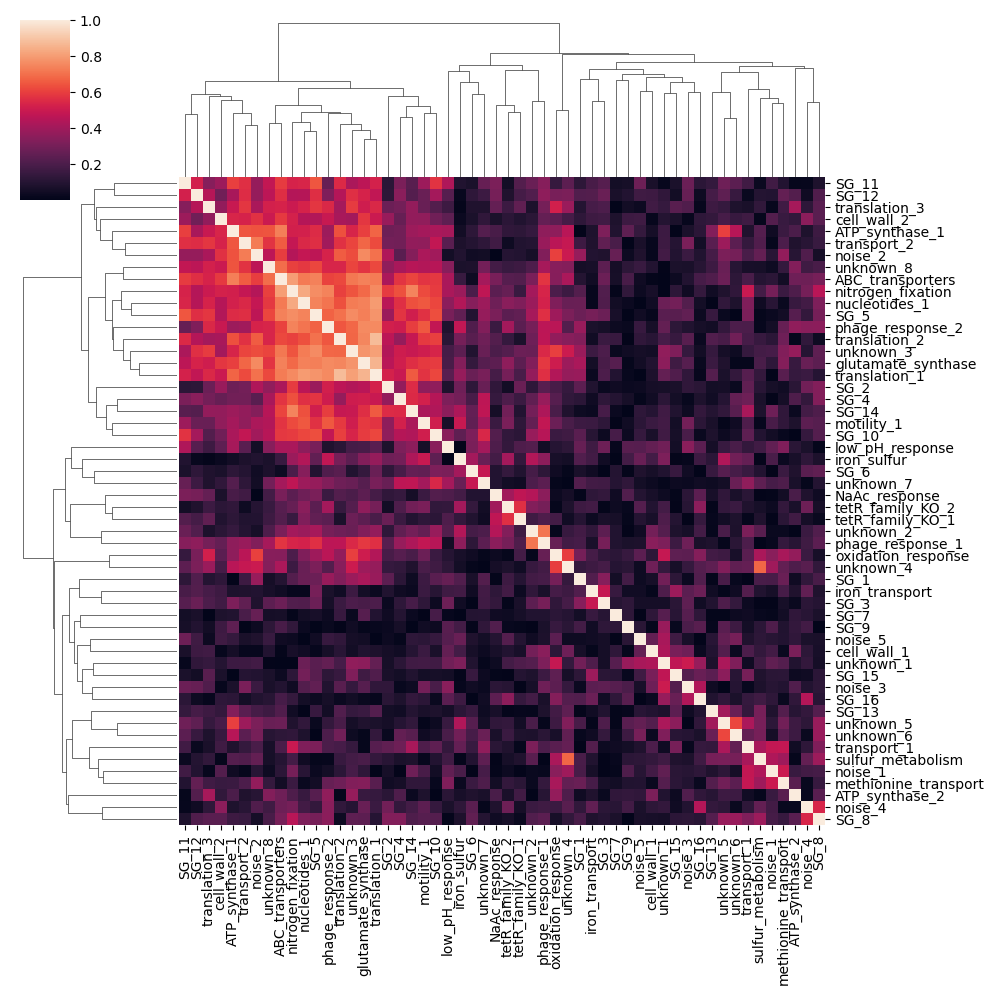

In [7]:
sns.clustermap(abs(ica_data.A.T.corr()), xticklabels=True, yticklabels=True)
plt.show()

# looking into specific metadata activities

In [17]:
df = ica_data.sample_table
samples = df[df['Aerobicity'] == 'aerobic'].index
df_A = ica_data.A[samples].copy()
df_A['mean'] = df_A.mean(axis = 1)
df_A.sort_values(by = 'mean', key = abs, ascending = False).head()

,Kiley_A_DZM0422_Aerobic_A,Kiley_A_DZM0422_Aerobic_B,Kiley_A_DZM0422_Aerobic_C,Kiley_A_WT_Aerobic_A,Kiley_A_WT_Aerobic_B,Kiley_A_WT_Aerobic_C,Kiley_B_WT_+O2_Ctrl_A,Kiley_B_WT_+O2_Ctrl_B,Kiley_B_WT_+O2_Ctrl_C,Kiley_B_WT_+O2_Paraquat_A,Kiley_B_WT_+O2_Paraquat_B,Kiley_B_WT_+O2_Paraquat_C,SRX3316537,SRX3316540,SRX3316548,SRX3316550,SRX3316559,mean
unknown_1,7.335280,9.484871,7.700632,6.088402,5.668351,5.148396,8.644250,7.437876,6.278454,10.941776,10.221641,9.757518,15.018631,7.263589,17.329134,-0.583992,0.879319,7.918478
oxidation_response,9.885250,10.122263,9.639106,9.723516,9.801443,9.667196,3.494748,2.667199,2.888938,14.523500,11.742961,14.180787,3.547148,-0.948046,4.825983,0.466309,4.117780,7.079181
translation_3,-14.878521,-14.755852,-14.976375,-4.606355,-4.553696,-4.054223,-0.451063,0.008628,-0.430405,-2.916887,-1.654444,-2.720177,-1.280081,0.862068,-2.433175,-0.791366,-0.592455,-4.130846
translation_1,-3.246716,-3.712392,-3.099570,-2.675524,-2.152655,-2.530814,-2.072103,-2.176066,-1.680727,-1.421172,-1.527749,-1.645034,-19.830110,-1.733975,-15.468173,-1.906342,2.426253,-3.791345
NaAc_response,3.784216,4.885075,4.455290,7.457384,6.776195,6.683214,4.904664,5.379546,3.627818,3.772869,3.771820,4.347521,-1.000509,-4.990443,0.387934,-1.818151,-0.144542,3.075288


In [18]:
df = ica_data.sample_table
samples = df[df['Carbon Source (g/L)'] == 'xylose'].index
df_A = ica_data.A[samples].copy()
df_A['mean'] = df_A.mean(axis = 1)
df_A.sort_values(by = 'mean', key = abs, ascending = False).head()

,SRX6700168,SRX6700169,SRX6700170,SRX6700171,SRX6700172,SRX6700173,SRX6700180,SRX6700181,SRX6700182,SRX6700183,...,SRX3541442,SRX3541443,SRX3541444,SRX3541445,SRX3541449,SRX3541450,SRX3541451,SRX3541452,SRX3541453,mean
translation_1,-14.018694,-15.055730,-14.821889,-20.199043,-23.117117,-21.794321,-15.347307,-14.926019,-14.757824,-21.604583,...,-15.048093,-16.466420,-14.454336,-12.823876,-16.840681,-17.039259,-19.420271,-17.130700,-16.723998,-18.248247
nitrogen_fixation,11.470131,12.651490,12.575175,14.597009,14.607092,15.197360,13.117435,13.341014,12.844351,14.440489,...,10.405857,10.269197,9.647964,9.431653,11.209166,12.154704,11.539513,11.715183,11.659404,13.166950
ATP_synthase_1,-2.412620,-3.342233,-3.769619,-7.341944,-9.580284,-10.386846,-1.970703,-3.366530,-2.401455,-10.095521,...,-10.591868,-7.570376,-7.673726,-8.762317,-15.369655,-14.909694,-16.125966,-16.090108,-17.045236,-10.911197
phage_response_1,6.802368,8.039905,7.441289,8.610931,7.965941,10.098000,8.241637,8.366785,7.958024,9.854268,...,7.231899,7.577967,7.363011,7.331107,8.599329,10.995466,10.898162,8.782168,8.966342,9.078054
phage_response_2,15.024523,14.869382,15.554749,5.889934,4.866236,6.097898,14.607152,17.113511,15.242902,6.960570,...,10.436642,9.998011,11.058150,10.914716,2.274694,0.027714,0.285524,2.438827,1.421718,9.039089
